TOPIC: Comparing Different Algorithms to Recognize Handwritten Characters- MACHINE LEARNING PROJECT- 2K19/IT/118 and 2K19/IT/120



In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
# from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import itertools

Using Deep Learning- CNN Algorithm

In [ ]:
# dir="/content/drive/My Drive/A_Z Handwritten Data.csv"
data = pd.read_csv(r"/content/drive/MyDrive/Handwriting Dataset/A_Z Handwritten Data.csv").astype('float32')

In [ ]:
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[10 rows x 785 columns]


In [ ]:
X = data.drop('0',axis = 1)
y = data['0']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

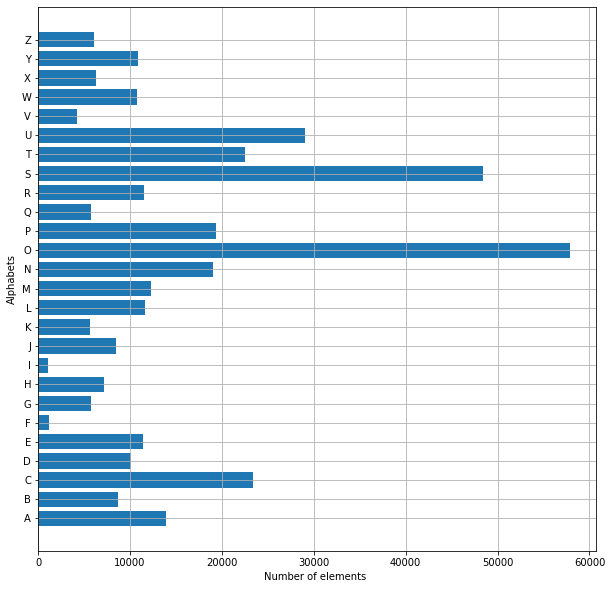

In [ ]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

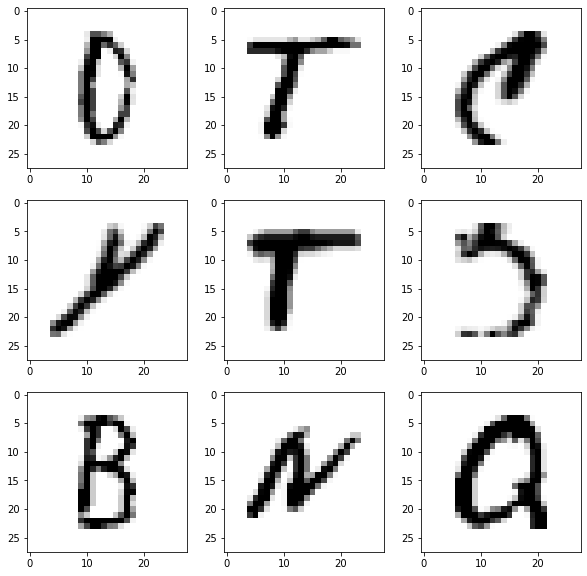

In [ ]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)
# Now we reshape the train & test image dataset so that they can be put in the model.
# New shape of train data:  (297960, 28, 28, 1)
# New shape of train data:  (74490, 28, 28, 1)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 117s 9ms/step - loss: 0.1583 - accuracy: 0.9569 - val_loss: 0.1003 - val_accuracy: 0.9732


In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9732447266578674]
The training accuracy is : [0.9569438695907593]
The validation loss is : [0.10026193410158157]
The training loss is : [0.15829959511756897]


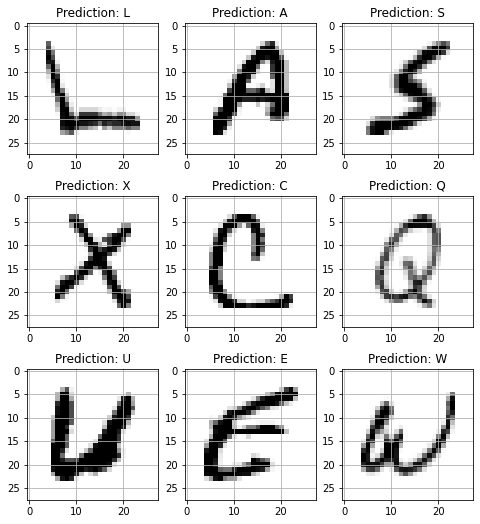

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

Using Machine Learning Algorithms

In [ ]:
english_dataset = np.array(data)

In [ ]:
english_alphabet = pd.DataFrame(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
                                 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
                                'u', 'v', 'w', 'x', 'y', 'z'], [i for i in range(1, 27)])
english_alphabet

,0
1,a
2,b
3,c
4,d
5,e
6,f
7,g
8,h
9,i
10,j


In [ ]:
X, y = english_dataset[:, 1:], english_dataset[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape, y.shape

((372450, 784), (372450,))

In [ ]:
def plot_letters(images, labels, width=14, height=14):
    rows, cols = 4, 6

    fig=plt.figure(figsize=(14, 14))
    sub_plot_i = 1

    for i in range(0, 20):
        fig.add_subplot(rows, cols, sub_plot_i)
        sub_plot_i += 1
        image = images[i].reshape(width, height)
        plt.imshow(image, cmap='gray')
        label = labels[i].astype(int) + 1
        plt.title(english_alphabet.loc[label][0])


    fig.tight_layout()    
    plt.show()

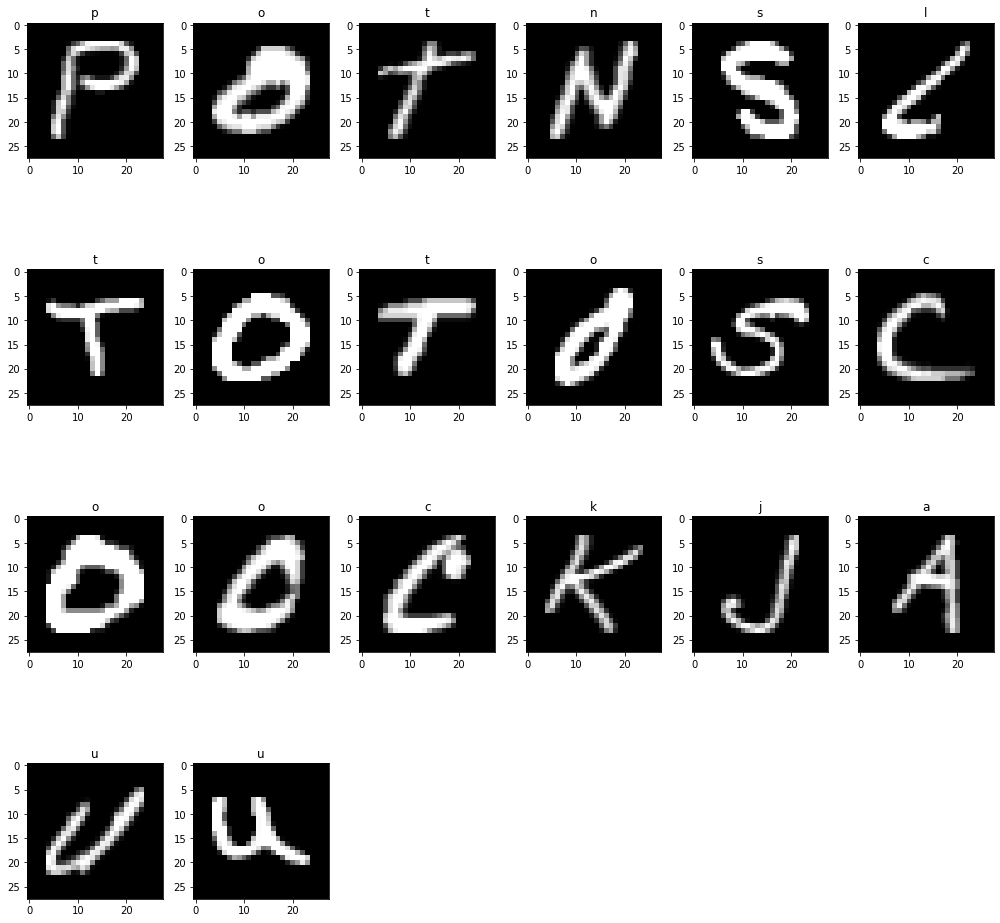

In [ ]:
plot_letters(X_train, y_train, 28, 28)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ImageTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, width=14, height=14,  is_img=False):
        self.width = width
        self.height = height
        self.is_img = is_img
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.is_img:
            images = []
            # load the image and convert to grayscale
            for img in X:                
                
                image = img.convert('L').resize((self.width, self.height))
                
                enhancer = ImageEnhance.Contrast(image)
                image = enhancer.enhance(1.0)
                
                images.append(np.asarray(image).reshape(-1))
            return np.array(images)
        else:
            return X

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


preprocessing_pipeline = Pipeline([
    ('image_trf', ImageTransformer()),
    ('scaler', StandardScaler()),
])

width, height = 28, 28
preprocessing_pipeline.set_params(image_trf__width=width, image_trf__height=height, image_trf__is_img=False)
X_train_proc = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

In [ ]:
def display_conf_mat(model, X, y):
    _, ax = plt.subplots(figsize=(20, 20))
    plot_confusion_matrix(model, X, y, 
                          display_labels=np.array(english_alphabet[0]).astype(str),
                          cmap=plt.cm.Blues, ax=ax)
    plt.show()
    

def custom_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(14, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_proc[:2000], y_train[:2000], cv=5)
scores.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


0.773

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


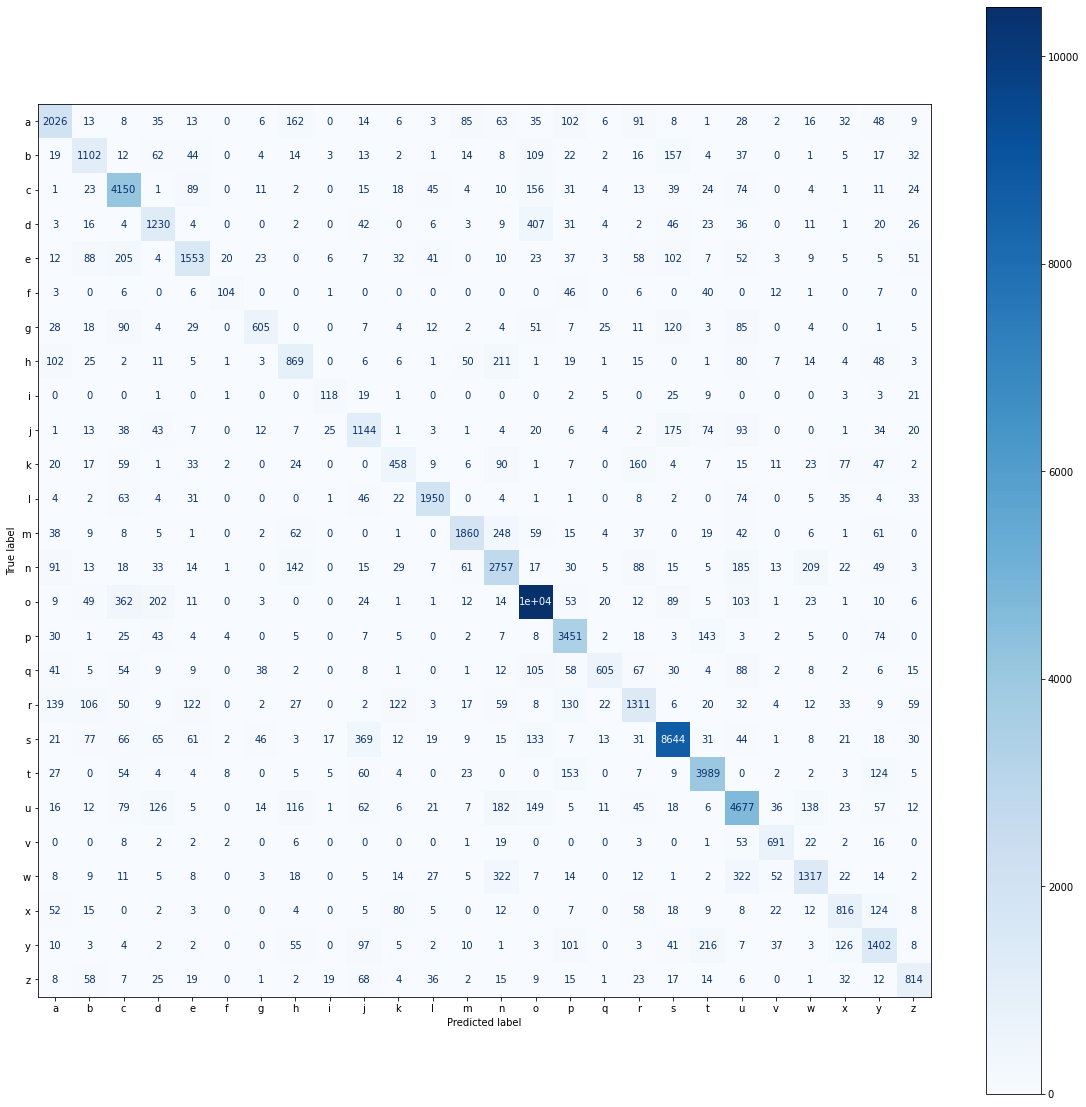

In [ ]:
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_proc[:2000], y_train[:2000])
display_conf_mat(log_clf, X_test, y_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(max_depth=10), X_train_proc, y_train, cv=5)
scores.mean()

0.8953450127533898

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


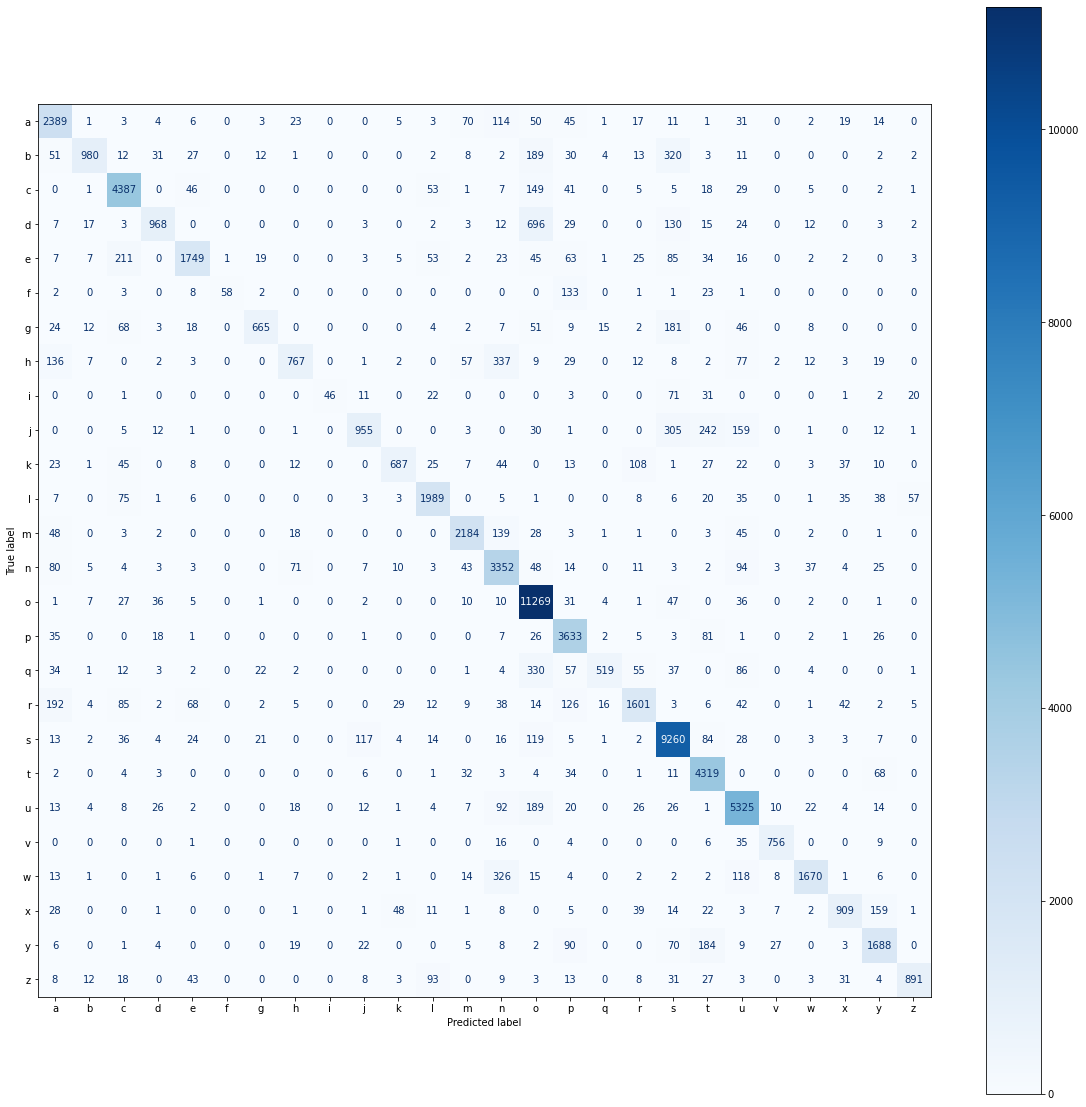

In [ ]:
forest_clf = RandomForestClassifier(max_depth=10)
forest_clf.fit(X_train_proc[:5000], y_train[:5000])
display_conf_mat(forest_clf, X_test, y_test)

In [ ]:
y_pred_forest = forest_clf.predict(X_test)
accuracy_score(y_pred_forest, y_test)

0.8459659014632837

We have successfully developed Handwritten character recognition (Text Recognition) with Python, Tensorflow, and Machine Learning libraries.


On comparing the accuracies of the 3 trained and tested models the CNN model was found out to be most efficient on the given dataset with the accuracy of 95.67% (0.9567) followed by Random Forest 89.53% (0.8953) and logistic regression 77.30% (0.7730).
Hence CNN is the most suited algorithm for the given problem statement.
